In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 13, 'ytick.labelsize': 13,
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 1200,
})

import yaml
import numpy as np

from irc.manager import IRCManager
from boxforage.utils import plot_single_box_episode

# Train one agent for a single box environment

In [2]:
manager = IRCManager(defaults='irc_defaults/single_box.yaml')

## Train an agent
We train a rational agent for the assume environment parameter $p_\mathrm{appear}=0.2, p_\mathrm{cue}=0.8, r_\mathrm{food}=10$.

The following can also be done by running `demo-train.py` in command line:
```bash
python demo-train.py env_param=[0.2,0.8,10] num_epochs=10
```

Checkpoint (epoch 10) loaded.
An agent trained for 10 epochs is found.
Agent (seed 0) was trained for 10 epochs.


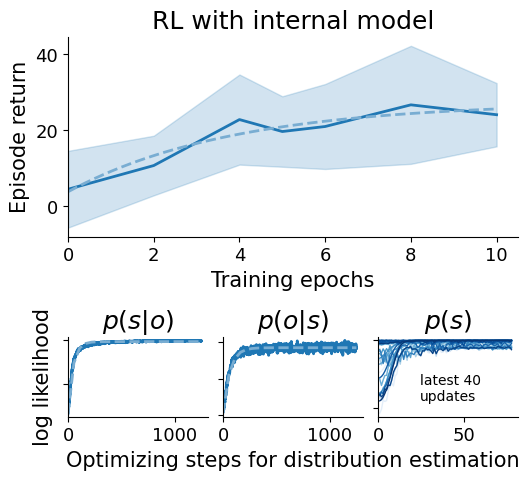

In [3]:
env_param = [0.2, 0.8, 10]
num_epochs = 10

agent = manager.train_agent(env_param, num_epochs=num_epochs)
agent, fig = manager.inspect_agent(env_param)

## Run the agent in an environment
We create another environment which has the same observation space and action space as the assumed one, albeit with a different set of environment parameters $(0.3, 0.6, 10)$.

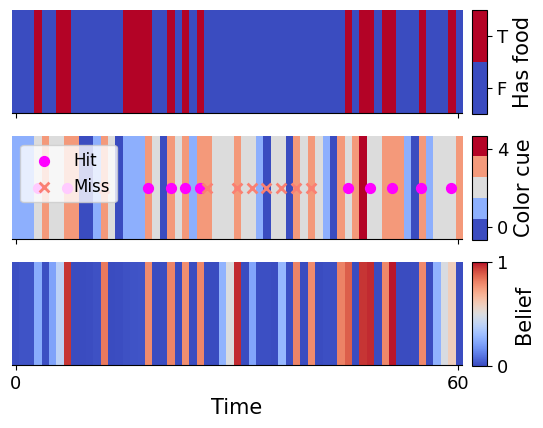

In [4]:
from boxforage.single_box import SingleBoxForaging

env = SingleBoxForaging(spec=manager.agent_manager.defaults.env.spec)
env.set_param([0.3, 0.6, 10])

episode = agent.run_one_episode(env=env, num_steps=60)
fig = plot_single_box_episode(episode)

# Train multiple agents for different environments

## Sweep over parameter grid

We define a grid of environment parameters, and train multiple agents for each of the combination using different random seeds.

The following can also be done by running `demo-sweep.py` in command line:
```bash
python demo-sweep.py env_param_grid=param_grids/single_box.yaml num_epochs=10 count=5
```

In [5]:
env_param_grid = [
    [0.05, 0.15, 0.2, 0.25], # p_appear
    [0.2, 0.4, 0.6, 0.8], # p_cue
    [2., 10.], # r_food
]

num_epochs = 10
count = 5 # number of agents to be trained
manager.train_agents(env_param_grid=env_param_grid, num_epochs=num_epochs, count=count)

In [7]:
report = manager.agents_overview(env_param_grid=env_param_grid)

Use default agent seeds [0, 1, 2] for each environment parameter.
Average number of trained epochs: 0.9
Approximate training time 7m08.36s per epoch.
Approximate evaluation time 0m50.68s.
Average training optimality 95.0%
